In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [14]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0.00000,1.00000,2.00000,3.00000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000


### Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [22]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE GROUP   463 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB


### Generate Descriptive Statistics and Visualizations
#### Question 1: For the 'Median value of owner-occupied homes' provide a boxplot

Evalution : This question carries 10 marks

Median of Owner-occupied homes is: 21.2


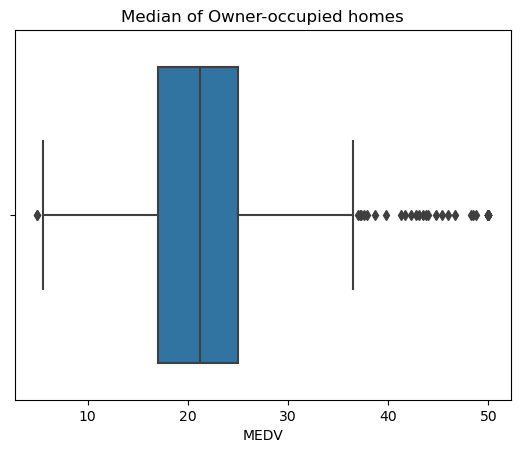

In [30]:
# Solution goes here:

#Median of MEDV in numbers
Median=boston_df['MEDV'].median()
print('Median of Owner-occupied homes is:',Median)

#Box plot to find Median
sns.boxplot(x='MEDV',data=boston_df)

#Title of boxplot
plt.title('Median of Owner-occupied homes')



#show box plot
plt.show()

#### Question 2: Provide a histogram for the Charles River variable

Evalution : This question carries 20 marks

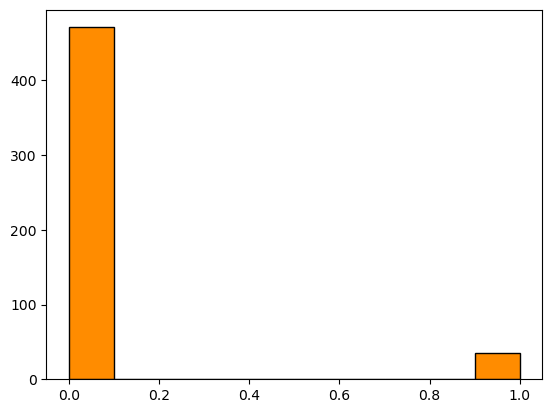

In [8]:
# Solution goes here:
# Historgam for the charles river variable
plt.hist(boston_df['CHAS'], color='darkorange', edgecolor='black')

plt.show()

#### Question 3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older

Evalution : This question carries 20 marks

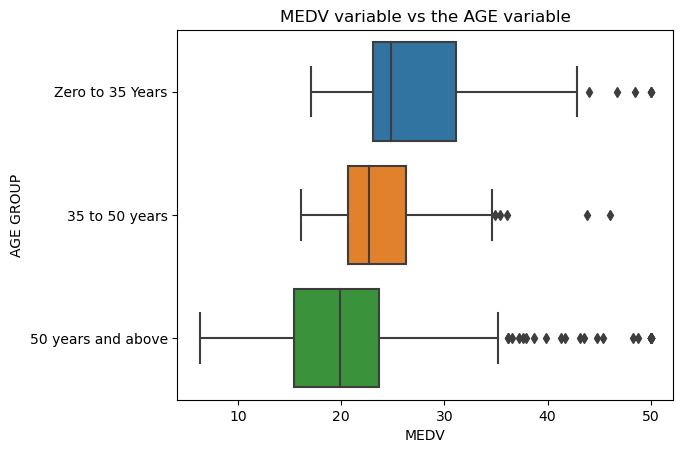

In [9]:
# Solution goes here:

#Defining age bins: 0 to 35 years,36 to 50 years, and 50 years and above.
#Assign each AGE value to each of these bins.

bins = [0, 35, 50, boston_df['AGE'].max()]
labels =['Zero to 35 Years','35 to 50 years','50 years and above']

#Creating a new column in your DataFrame that holds the discretized age categories(Age groups).
boston_df['AGE GROUP']=pd.cut(boston_df['AGE'],bins=bins, labels=labels, right=False)

#creating boxplot for MEDV variable vs the AGE variable
sns.boxplot(x='MEDV',y='AGE GROUP',data=boston_df)

#Title of the table
plt.title('MEDV variable vs the AGE variable')
plt.show()

#### Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Evalution : This question carries 20 marks

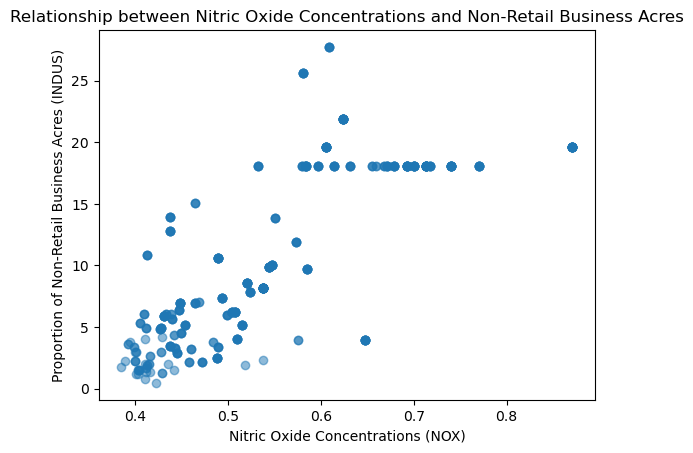

Ralationship between NOX and INDUS is: 0.7636514469209141


In [10]:
# Solution goes here:
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')

#add labels
plt.xlabel("Nitric Oxide Concentrations (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")

plt.show()

#if relationship is positive and close to 1 then it is good correlation 
corr=np.corrcoef(boston_df['NOX'], boston_df['INDUS'])[0,1]
print( 'Ralationship between NOX and INDUS is:',corr)

#### Conclusion:The relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) is positively correlated.his means that as the proportion of non-retail business land (INDUS) in an area increases, the concentration of Nitric Oxides (NOX) also tends to increase. This positive correlation suggests that areas with more industrial or commercial activities may have higher levels of air pollution

#### Question 5: Create a histogram for the pupil to teacher ratio variable.

Evalution : This question carries 20 marks

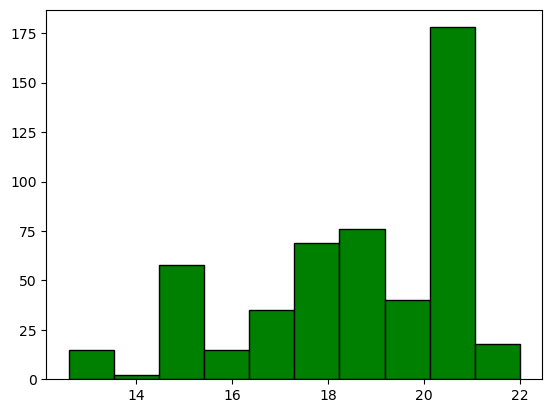

In [31]:
# Solution goes here:

# Histogram for the pupil to teacher ratio variable.
plt.hist(boston_df['PTRATIO'], color='green', edgecolor='black' ) 

plt.show()

#### Question 6: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Evalution : This question carries 10 marks

In [27]:
# Solution goes here:
pearson_corr = np.corrcoef(boston_df['NOX'], boston_df['INDUS'])[0, 1]

print('Pearson Correlation:', pearson_corr)

Pearson Correlation Coefficient: 0.7636514469209141


## Thank you...